In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
df = pd.read_csv("Crop_recommendation.csv")

In [11]:
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample Data:\n", df.head())

✅ Dataset Loaded Successfully!
Shape: (2200, 8)
Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Sample Data:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


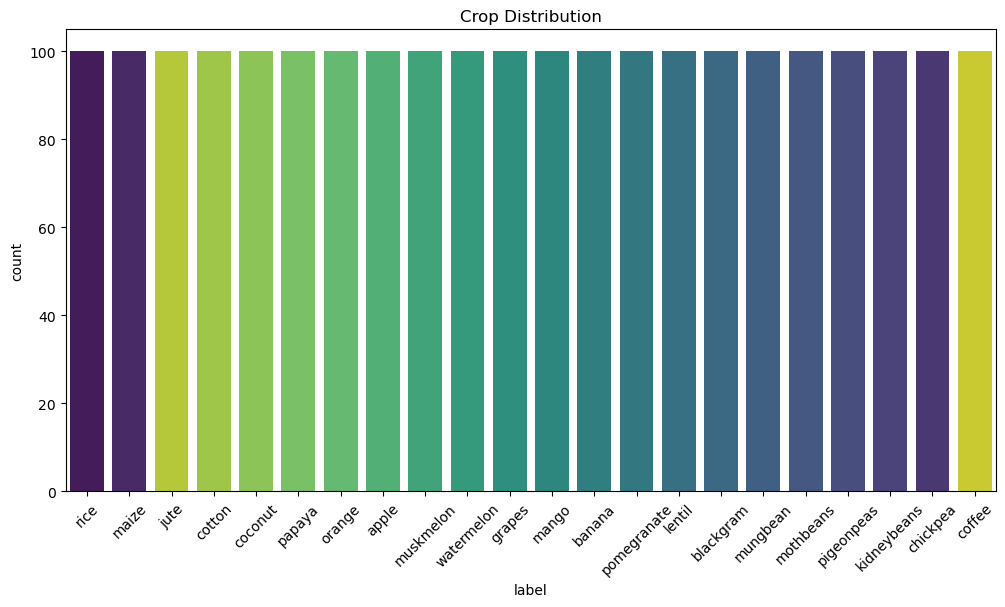

In [21]:
# 📊 Distribution of crop labels
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='label',
    hue='label',   # 👈 required in seaborn ≥0.14
    order=df['label'].value_counts().index,
    palette="viridis",
    legend=False   # 👈 hides duplicate legends
)

plt.xticks(rotation=45)
plt.title("Crop Distribution")
plt.show()


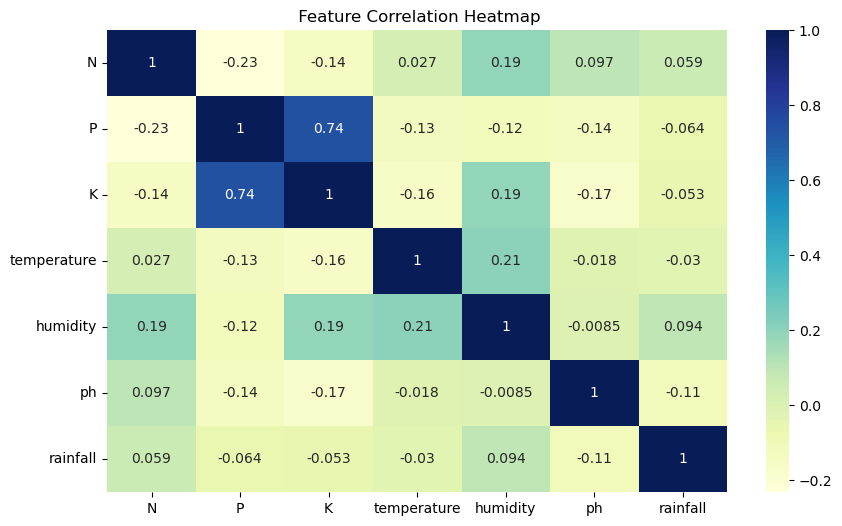

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop("label", axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title(" Feature Correlation Heatmap")
plt.show()

In [27]:
X = df.drop('label', axis=1)
y = df['label']

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)
acc = round(accuracy_score(y_test, y_pred)*100, 2)
print("\n✅ Model Accuracy:", acc, "%")


✅ Model Accuracy: 99.32 %


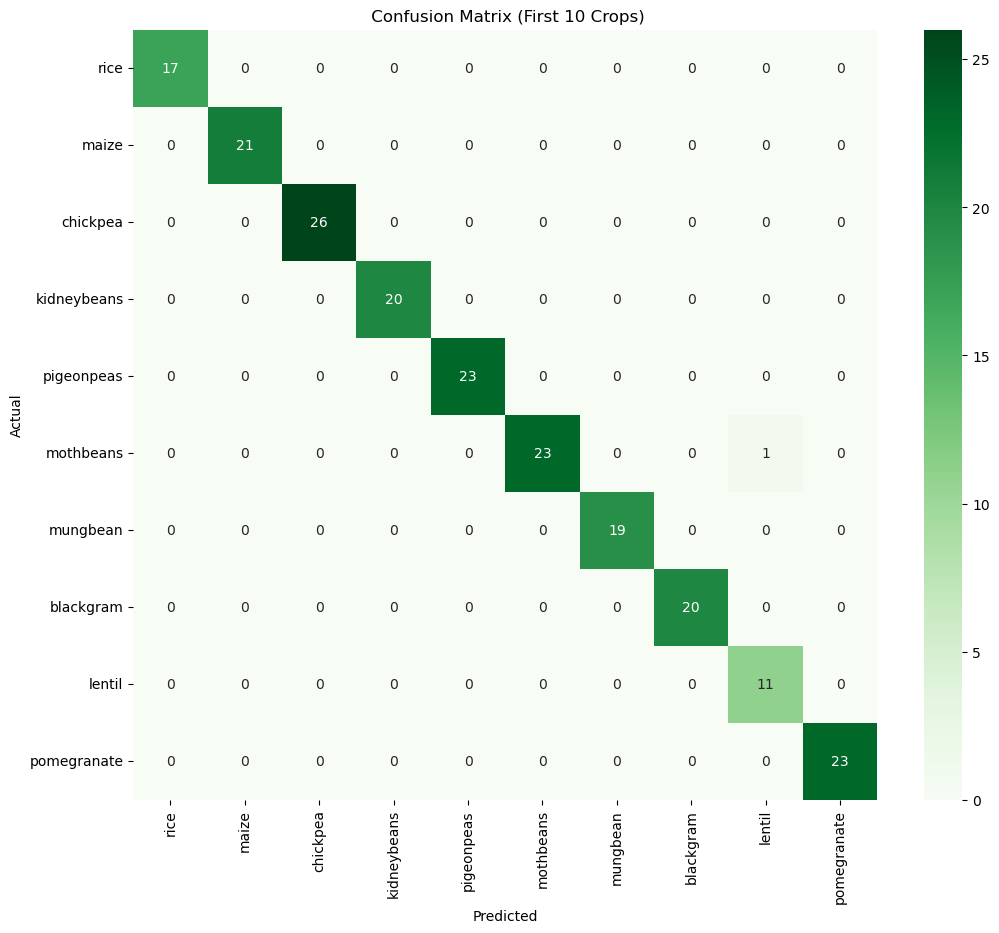

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(cm[:10,:10], annot=True, fmt="d", cmap="Greens",
            xticklabels=df['label'].unique()[:10],
            yticklabels=df['label'].unique()[:10])
plt.title(" Confusion Matrix (First 10 Crops)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
sample = [[90, 40, 40, 25, 80, 6.5, 200]]
prediction = model.predict(sample)
print("\n Recommended Crop for given conditions:", prediction[0])


 Recommended Crop for given conditions: rice


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
